# Sentiment Prediction Model

In [1]:
import pandas as pd
import numpy as np
from matplotlib import (mlab, pyplot as plt)

from sentiment_analysis import (database as db, entities as et, util)

def plot_results(actual, expected):
    plt.title('Predicted (green) vs Desired (red)')
    plt.ylabel('Accuracy')
    plt.xlabel('Rating')
    plt.scatter(actual, expected, color=util.green, alpha=0.5)
    plt.plot([0, 10], [0, 10], color='red')
    plt.show()
    plt.title('Predicted (green) vs Actual (red)')
    plt.ylabel('Review Count')
    plt.xlabel('Rating')
    plt.hist(actual, 40, facecolor=util.green)
    plt.hist(expected, 40, facecolor='red', alpha=0.5)
    plt.show()

In [2]:
onehot = et.SigWordUse.onehot()
train, test = onehot.iloc[:,3:], onehot['_rating']
sw = pd.read_sql_table('sig_word', db.engine)
weights = pd.Series(sw.median_q50.values, index=sw.word).sort_index()

In [3]:
Qone = train.multiply(weights)
N_total = train.sum(axis=1)
predictions = Qone.sum(axis=1) / N_total
util.rmse(test, predictions)

1.4054544537553992

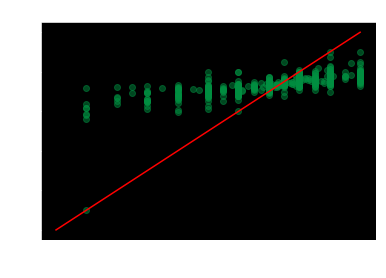

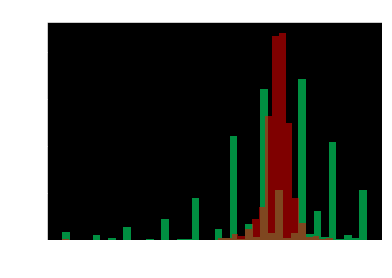

In [4]:
plot_results(test, predictions)